# ***Trabalho de DataLab***

Tatiana Fernanda Terra

**ANÁLISE EXPLORATÓRIA DE DADOS**

*Realizando a importação de Bibliotecas*

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
import numpy as np

*Carregando os dados do dataset*

In [ ]:

df = pd.read_excel('/content/drive/MyDrive/Base_Full.xlsx')


*Leitura das primeiras 3 linhas do dataset*

In [ ]:

df.head(3)

,Contrato,PessoaFisica,Nome,Sexo,DataNascimento,NomeMae,Uf,EstadoCivil,Profissao,NumeroContrato,Carteira,DataRecebimentoContrato,VencDebito,DataAssociacao,qtdeTItulo,VLR_DEBITO,QTDE_TENTATIVAS_CTTO,QTDEPGTO,VLR_PGTO
0,10001798,F,LIB,F,1965-09-12 00:00:00.000,NEL,NaN,Casado(a),IGREJA ADVENTISTA,10001798.0,PDD (121 a 360),2012-01-31,2011-05-05 00:00:00.000,2000-11-07,1.0,1576.71,48.0,NaN,NaN
1,10009549,F,JOS,NaN,1980-04-10 00:00:00.000,NUL,NaN,Solteiro(a),PAULO SERGIO PEREIRA ASSAF/AUXI,10009549.0,PDD (121 a 360),2008-08-20,2007-11-20 00:00:00.000,2000-11-09,1.0,56.74,21.0,NaN,NaN
2,10016650,F,EDS,M,1971-01-22 00:00:00.000,DIO,NaN,Casado(a),IRMAO MOSCA LTDA,10016650.0,PDD (121 a 360),2012-03-29,2011-09-30 00:00:00.000,2000-11-11,8.0,912.00,36.0,NaN,NaN


*Exibindo a quantidade de linhas e colunas do dataset*

---



In [ ]:

df.shape

(5000, 19)

*Com a função info() também podemos conseguir outras informações importantes do dataset*

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Contrato                 5000 non-null   int64         
 1   PessoaFisica             5000 non-null   object        
 2   Nome                     5000 non-null   object        
 3   Sexo                     4986 non-null   object        
 4   DataNascimento           5000 non-null   object        
 5   NomeMae                  4967 non-null   object        
 6   Uf                       1876 non-null   object        
 7   EstadoCivil              4990 non-null   object        
 8   Profissao                4669 non-null   object        
 9   NumeroContrato           4775 non-null   float64       
 10  Carteira                 4775 non-null   object        
 11  DataRecebimentoContrato  4775 non-null   datetime64[ns]
 12  VencDebito               4560 non-

*Análise de missings por variaveis*

In [ ]:

df.isnull().sum()

Contrato                      0
PessoaFisica                  0
Nome                          0
Sexo                         14
DataNascimento                0
NomeMae                      33
Uf                         3124
EstadoCivil                  10
Profissao                   331
NumeroContrato              225
Carteira                    225
DataRecebimentoContrato     225
VencDebito                  440
DataAssociacao              225
qtdeTItulo                  588
VLR_DEBITO                  588
QTDE_TENTATIVAS_CTTO        348
QTDEPGTO                   4452
VLR_PGTO                   4452
dtype: int64

*Ao invés de plotar os gráficos para apenas algumas das features, podemos analisar todos os dados de uma vez. Abaixo o pairplot vai plota a distribuição de cada feature.



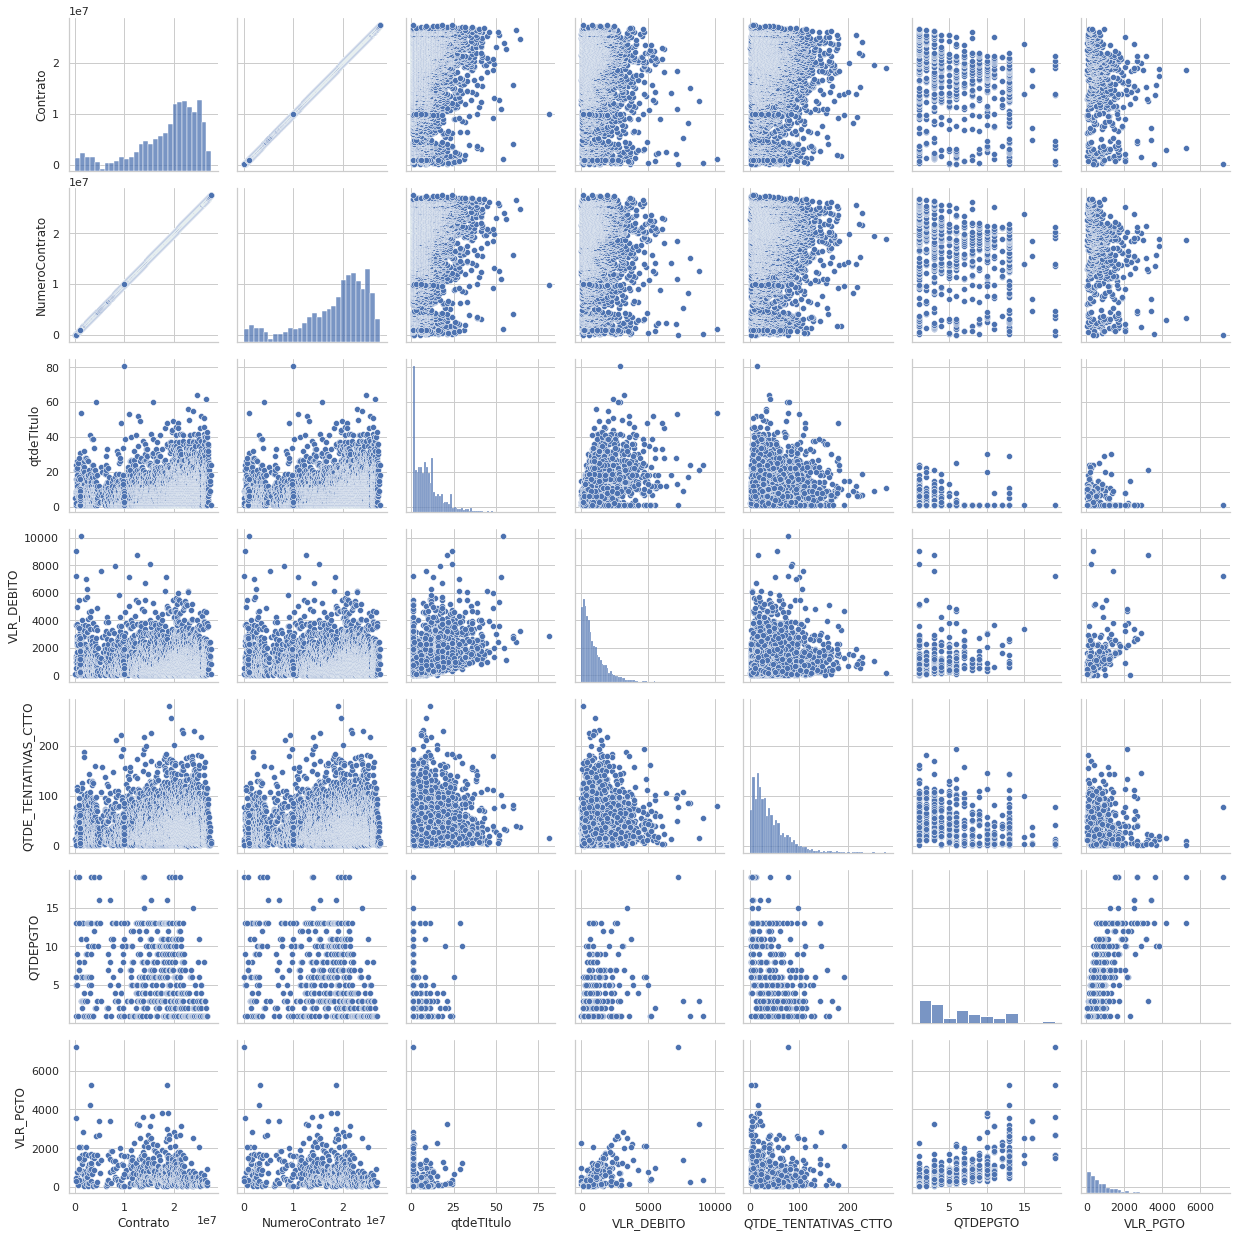

In [ ]:
sns.pairplot(df)

*Realiza a conversão da data de nascimento para "datetime", em seguida  faz o calculo da idade com base na data de nascimento, criando uma nova coluna com a idade das pessoas.*

In [ ]:
df['DataNascimento'] = pd.to_datetime(df['DataNascimento'])
df['Idade'] = (datetime.now() - df['DataNascimento']) / 365
df['Idade'] = (df['Idade']).dt.days
df['Idade'].value_counts()

38     171
39     166
34     165
33     164
43     163
      ... 
97       3
99       1
96       1
94       1
101      1
Name: Idade, Length: 72, dtype: int64

*Converte a data de vencimento do debito para "datetime"*


*Depois calcula a idade do debito.*

In [ ]:
df['VencDebito'] = pd.to_datetime(df['VencDebito'])
df['IdadeDebito'] = (datetime.now() - df['VencDebito']) / 365
df['IdadeDebito'] = (df['IdadeDebito']).dt.days
df['IdadeDebito'].value_counts()

9.0     1866
10.0     974
11.0     684
8.0      455
12.0     403
13.0     171
14.0       7
Name: IdadeDebito, dtype: int64

*De forma simples e rápida, mostra um conjunto de estatisticas descritivas: quantidade de valores, média, desvio padrão, valor minimo e maximo, quartis da distribuição*

In [ ]:

df.describe().round()

,Contrato,NumeroContrato,qtdeTItulo,VLR_DEBITO,QTDE_TENTATIVAS_CTTO,QTDEPGTO,VLR_PGTO,Idade,IdadeDebito
count,5000.0,4775.0,4412.0,4412.0,4652.0,548.0,548.0,5000.0,4560.0
mean,18424095.0,18387605.0,10.0,987.0,41.0,6.0,831.0,46.0,10.0
std,6765830.0,6777531.0,9.0,1006.0,34.0,4.0,826.0,13.0,1.0
min,49644.0,49644.0,1.0,0.0,1.0,1.0,47.0,27.0,8.0
25%,14937166.0,14878440.0,4.0,299.0,17.0,3.0,272.0,36.0,9.0
50%,20363686.0,20344936.0,8.0,675.0,31.0,6.0,556.0,44.0,9.0
75%,23454588.0,23436324.0,13.0,1336.0,56.0,10.0,1101.0,54.0,11.0
max,27656613.0,27530486.0,81.0,10142.0,278.0,19.0,7214.0,101.0,14.0


*Neste grafico mostra a quantidade de pagamentos*

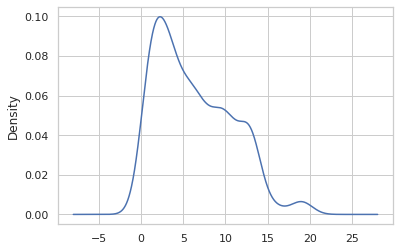

In [ ]:
df['QTDEPGTO'].plot.kde()

*Neste gráfico mostra a quinatidade de tentativas de contato com o cliente*

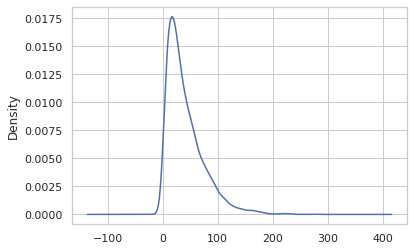

In [ ]:
df['QTDE_TENTATIVAS_CTTO'].plot.kde()

*Histograma mostrando valores de debitos em aberto*

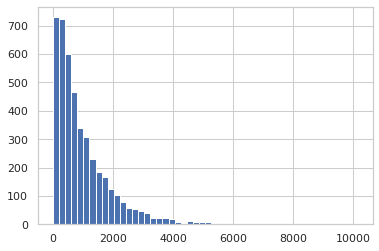

In [ ]:
df['VLR_DEBITO'].hist(bins=50)

*Quantidade de devedores por Estado*

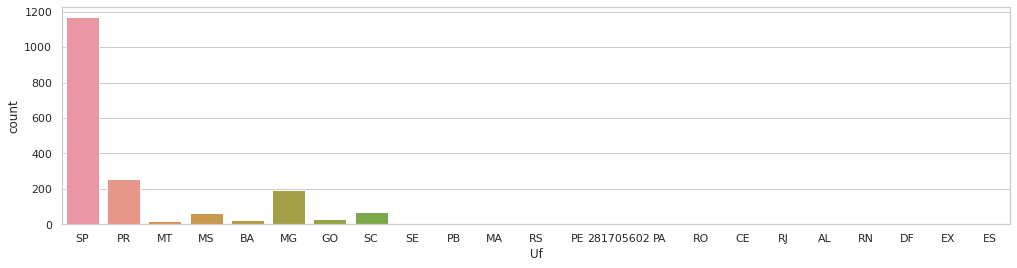

In [ ]:
plt.figure(figsize=(17,4))
graph = sns.countplot(x='Uf', data=df)

*Analise de devedores por Estado Civil*

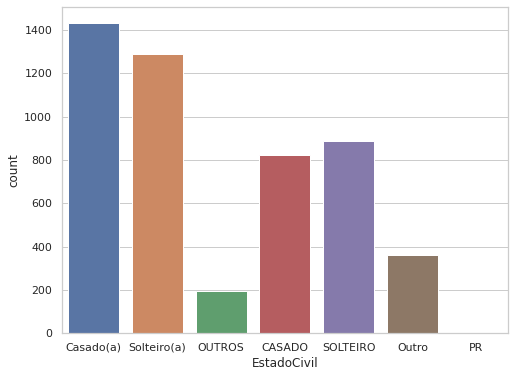

In [ ]:
plt.figure(figsize=(8,6))
graph = sns.countplot(x='EstadoCivil', data=df)

*Frequência relativa por sexo dos devedores*

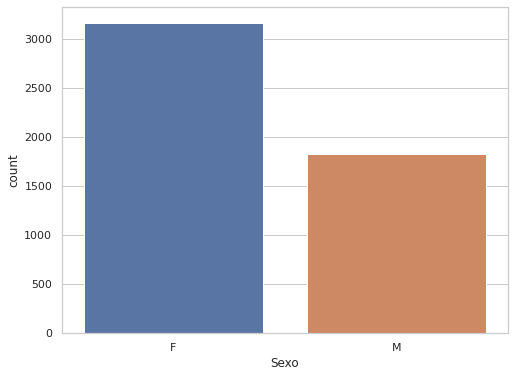

In [ ]:
plt.figure(figsize=(8,6))
graph = sns.countplot(x='Sexo', data=df)

*Analise grafica pela idade de devedores*

> Bloco com recuo



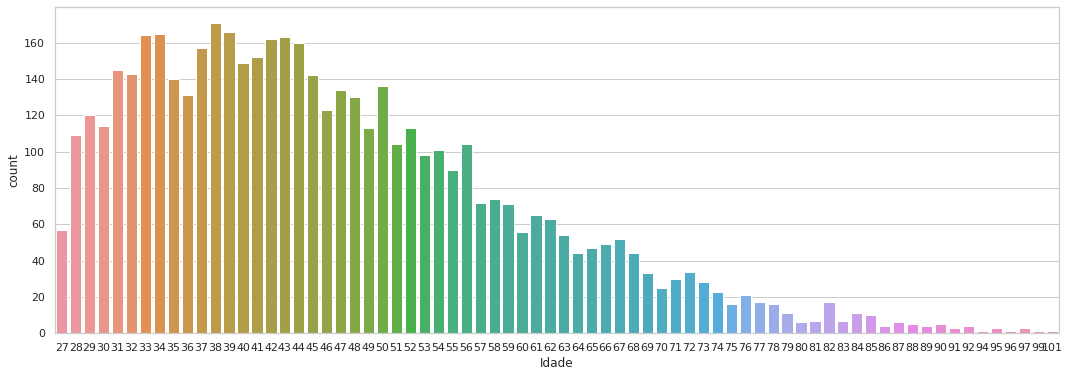

In [ ]:
plt.figure(figsize=(18,6))
graph = sns.countplot(x='Idade', data=df)

*Realizando a análise da quantidade de devedores por tempo de debito.*

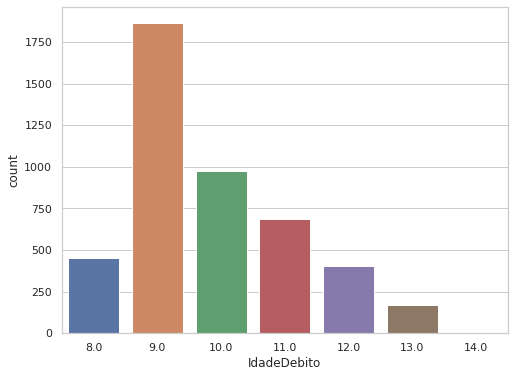

In [ ]:
plt.figure(figsize=(8,6))
graph = sns.countplot(x='IdadeDebito', data=df)

*Outliers nas variaveis IdadeDebito x Idade*

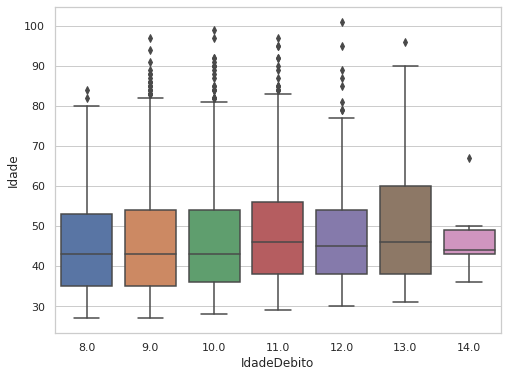

In [ ]:

get_ipython().run_line_magic('matplotlib', 'inline')

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

graph = sns.boxplot(x='IdadeDebito', y='Idade', data=df, orient="v")